Conjunto de datos de Salarios de data science
* fuente : UCI Machine Learning Repository
* Tamaño : 345.4+ KB
* entradas : 136757
* Columnas :
 * 0   work_year           136757 non-null  int64
 * 1   experience_level    136757 non-null  object
 * 2   employment_type     136757 non-null  object
 * 3   job_title           136757 non-null  object
 * 4   salary              136757 non-null  int64
 * 5   salary_currency     136757 non-null  object
 * 6   salary_in_usd       136757 non-null  int64
 * 7   employee_residence  136757 non-null  object
 * 8   remote_ratio        136757 non-null  int64
 * 9   company_location    136757 non-null  object
 * 10  company_size        136757 non-null  object

In [ ]:
# Se usa biblioteca google para poder usar archivos .
from google.colab import drive
# Se conecta colab con drive.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Se cargan las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Se carga el conjunto de datos
path ="/content/drive/MyDrive/CLASE MACHINE LEARNING/DATA_CORES/dataset4.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
1,2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2,2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
3,2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M


#### Análisis Exploratorio de Datos (EDA) Inicial

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136757 entries, 0 to 136756
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           136757 non-null  int64 
 1   experience_level    136757 non-null  object
 2   employment_type     136757 non-null  object
 3   job_title           136757 non-null  object
 4   salary              136757 non-null  int64 
 5   salary_currency     136757 non-null  object
 6   salary_in_usd       136757 non-null  int64 
 7   employee_residence  136757 non-null  object
 8   remote_ratio        136757 non-null  int64 
 9   company_location    136757 non-null  object
 10  company_size        136757 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.5+ MB


#### Se verifican los datos para encontrar información relevante,
Los datos estan completos, son 11 columnas entre object e int.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,136757.0,2024.374686,0.679644,2020.0,2024.0,2024.0,2025.0,2025.0
salary,136757.0,163043.175304,215043.504334,14000.0,106000.0,147000.0,198800.0,30400000.0
salary_in_usd,136757.0,157490.722756,74173.546839,15000.0,105900.0,146000.0,197800.0,800000.0
remote_ratio,136757.0,20.909716,40.594326,0.0,0.0,0.0,0.0,100.0


##### Al ver la estadistica se analizara el salario máximo y la columna remote_ratio, con datos extraños.

In [ ]:
# se reviza duplicados
df[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
25,2025,MI,FT,Manager,27636,EUR,29090,AT,0,AT,M
73,2025,EN,FT,Data Analyst,65000,GBP,82278,GB,0,GB,M
128,2025,MI,FT,Manager,125000,USD,125000,US,0,US,M
129,2025,MI,FT,Manager,110000,USD,110000,US,0,US,M
134,2025,SE,FT,Solutions Architect,255000,USD,255000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
136460,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
136545,2021,MI,FT,Data Scientist,150000,USD,150000,US,100,US,M
136599,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
136679,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S


#### Al revisar la data se verifica que las filas no estan duplicadas completamente.

In [ ]:
# se revisa nulos
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
df["remote_ratio"].value_counts()

,count
remote_ratio,
0,108001
100,28435
50,321


#### Se concidera que el valor 0 es parte de los datos

In [ ]:
df["salary"].value_counts()

,count
salary,
160000,2495
110000,2288
150000,2240
100000,1885
180000,1873
...,...
1799997,1
4900000,1
111775,1


In [ ]:
df["salary_in_usd"].value_counts()

,count
salary_in_usd,
160000,2476
110000,2228
150000,2216
180000,1860
100000,1804
...,...
87738,1
21669,1
42197,1


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
df["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [ ]:
df["employment_type"].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [ ]:
df["job_title"].unique()

array(['Data Scientist', 'Data Product Manager',
       'Machine Learning Engineer', 'Software Developer', 'Director',
       'Software Engineer', 'Manager', 'Developer',
       'Data Governance Lead', 'Data Governance', 'Engineering Manager',
       'Data Product Owner', 'AI Engineer', 'Engineer', 'Data Engineer',
       'BI Analyst', 'Data Quality Analyst', 'Product Manager',
       'Data Analyst', 'Platform Engineer', 'Data Management Specialist',
       'Data Management', 'Principal Scientist', 'Postdoctoral Fellow',
       'Research Engineer', 'Business Intelligence Analyst', 'Analyst',
       'Quantitative Researcher', 'Site Reliability Engineer',
       'Architect', 'Solutions Architect', 'Solutions Engineer',
       'Product Analyst', 'DevOps Engineer', 'Automation Engineer',
       'Applied Scientist', 'Solution Engineer', 'Clinical Aide',
       'Decision Scientist', 'Researcher', 'Postdoctoral Researcher',
       'Business Intelligence Developer', 'Associate', 'Bioinformatic

In [ ]:
df["employee_residence"].unique()

array(['US', 'CA', 'AT', 'LV', 'GB', 'PT', 'FI', 'AU', 'NZ', 'SK', 'IE',
       'ES', 'DE', 'NL', 'PL', 'FR', 'BR', 'ZA', 'AR', 'CO', 'MX', 'UA',
       'CH', 'LT', 'PH', 'BE', 'TH', 'JM', 'JP', 'MT', 'IT', 'MK', 'SI',
       'HK', 'LS', 'IN', 'ID', 'PE', 'SG', 'HU', 'RO', 'PA', 'EE', 'LU',
       'DZ', 'EG', 'CL', 'GR', 'KE', 'CD', 'SE', 'KR', 'TW', 'NO', 'CZ',
       'TR', 'NG', 'CY', 'DK', 'AE', 'BG', 'JO', 'RS', 'PR', 'SV', 'EC',
       'DO', 'MY', 'XK', 'CR', 'ZM', 'AM', 'RW', 'IL', 'LB', 'HR', 'PK',
       'HN', 'VE', 'BM', 'VN', 'GE', 'SA', 'OM', 'BA', 'UG', 'MU', 'QA',
       'RU', 'TN', 'GH', 'AD', 'MD', 'UZ', 'CF', 'KW', 'IR', 'AS', 'CN',
       'BO', 'IQ', 'JE'], dtype=object)

In [ ]:
df["remote_ratio"].unique()

array([100,   0,  50])

In [ ]:
df["company_location"].unique()

array(['US', 'CA', 'AT', 'LV', 'GB', 'PT', 'FI', 'AU', 'NZ', 'SK', 'IE',
       'ES', 'DE', 'NL', 'PL', 'FR', 'BR', 'ZA', 'AR', 'CO', 'MX', 'UA',
       'CH', 'LT', 'PH', 'BE', 'TH', 'JM', 'JP', 'MT', 'MK', 'SI', 'HK',
       'LS', 'IN', 'PE', 'SG', 'IT', 'HU', 'RO', 'PA', 'EE', 'LU', 'DZ',
       'EG', 'CL', 'GR', 'KE', 'CD', 'SE', 'KR', 'TW', 'NO', 'CZ', 'TR',
       'CY', 'DK', 'AE', 'BG', 'ID', 'JO', 'RS', 'PR', 'SV', 'EC', 'DO',
       'MY', 'XK', 'CR', 'ZM', 'AM', 'IL', 'LB', 'NG', 'HR', 'PK', 'HN',
       'VE', 'AS', 'SA', 'OM', 'BA', 'VN', 'GI', 'MU', 'RU', 'QA', 'GH',
       'AD', 'CF', 'IR', 'BS', 'IQ', 'CN', 'MD'], dtype=object)

In [ ]:
df["company_size"].unique()

array(['M', 'L', 'S'], dtype=object)

#### Se Visualizan los datos

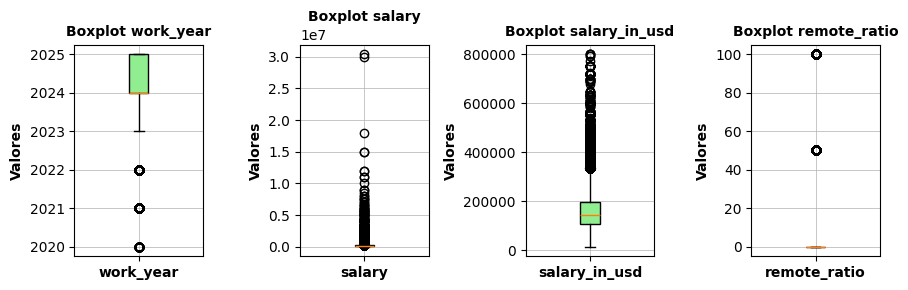

In [ ]:
# # Crear la figura y los subplots.
fig, axs = plt.subplots(1,4, figsize=(9, 3))
# Se deja el array en una dimension para no usar indices con dos dimensiones
axs = axs.flatten()
# Columnas numéricas a graficar
numerical_cols = df.select_dtypes(include=(['int64','float64']))
# Boxplot para las columnas numéricas
prop_caja = dict(facecolor='lightgreen')
for i, col in enumerate(numerical_cols[:15]):
  axs[i].boxplot(df[col], patch_artist=True, boxprops=prop_caja)
  axs[i].set_title(f"Boxplot {col}", fontsize=10, fontweight='bold')
  axs[i].set_xticklabels([col], fontweight='bold')
  axs[i].set_ylabel("Valores", fontweight='bold')
  axs[i].grid(True, linewidth=0.5)

plt.tight_layout()
plt.show()

#### En el boxplot de work_year ; los años estan concentrados entre 2020 y 2022.
#### No hay outliers, los años son valores categoricos.
#### El boxplot del salario; la mayoria de los salarios estan entre 0.0 y 2.5 sobre el bigote superior. al parece salarios excepcionalmente altos .
### El boxplot de salario en usa, son salarios tipicos entre 0 y 200.000. Valores extremos por encima de 400.000 con puntos dispersos.
#### EL boxplt de remote_ratio; concentra en 0%, 50% y 100%.


#### Se aplica mapa de calor para ver la correlaciones de las variables numericas.

In [ ]:
# Se reviza los datos con la correlaciones de Pearson

df_numericas = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = df_numericas.corr(method='pearson')
print(correlation_matrix)

               work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000 -0.013612       0.017604     -0.080210
salary         -0.013612  1.000000       0.308572     -0.003779
salary_in_usd   0.017604  0.308572       1.000000     -0.048555
remote_ratio   -0.080210 -0.003779      -0.048555      1.000000


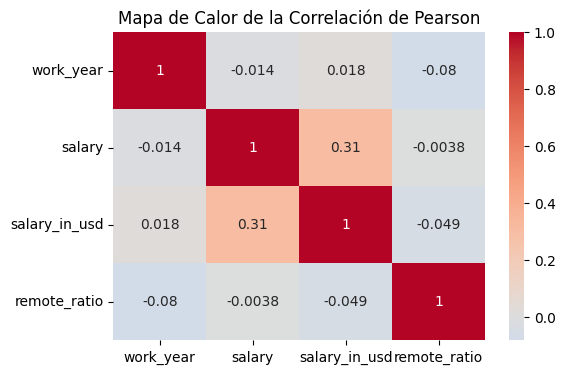

In [ ]:
# Se Crea el  mapas de calor
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

#### En el mapa la correlación más notoria es salary_in_usa y salary con un 0.31 ques es moderada, pero comparada con las correlaciones siguientes,es la mas importante.
#### Se desprende de la información que las varibles numericas en la mayoria no estan correlacionadas entre ellas.